In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
df = pd.read_csv(r'D:\pycharm\lerning\ML_\tasks\titanic\data\gender_submission.csv')
test = pd.read_csv(r'D:\pycharm\lerning\ML_\tasks\titanic\data\test.csv')
train = pd.read_csv(r'D:\pycharm\lerning\ML_\tasks\titanic\data\train.csv')

Посмотрим на однородность данных, да какие вообще есть

<Axes: >

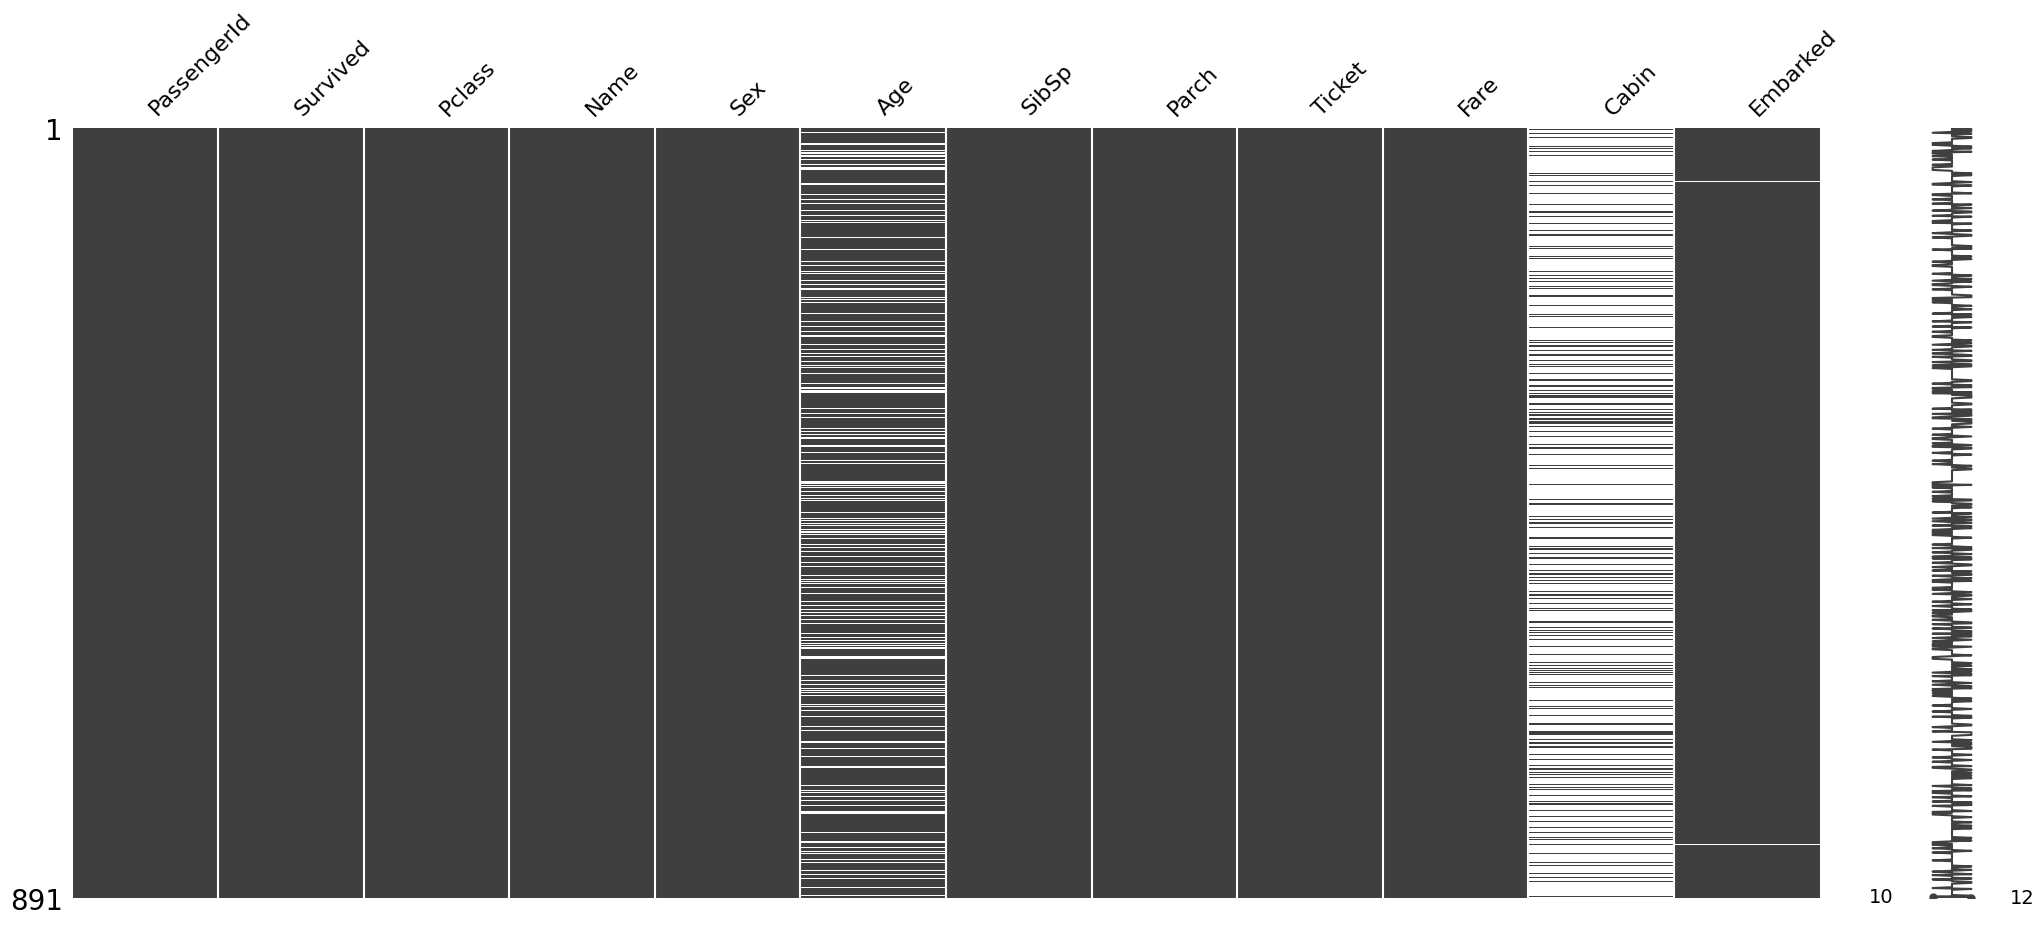

In [4]:
msno.matrix(train)

Посмотрим что есть в тестовой выборке

<Axes: >

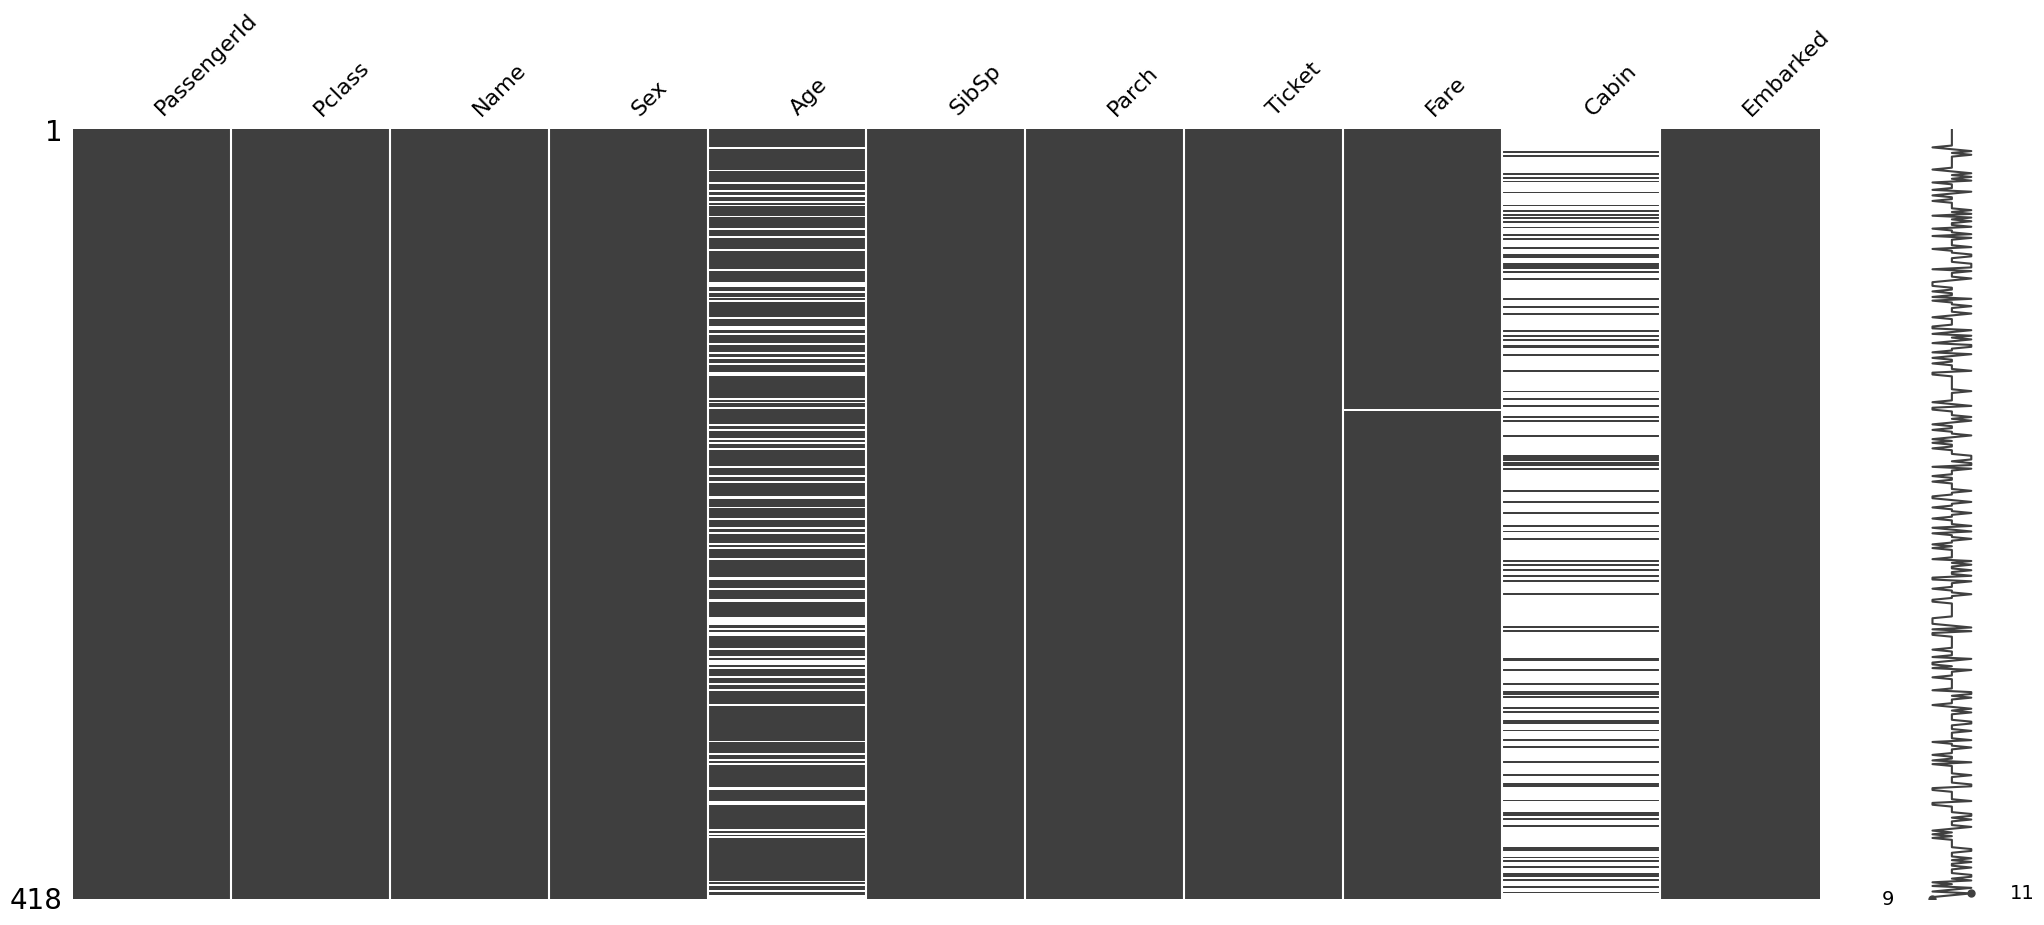

In [5]:
msno.matrix(test)

Соединим все данные в один data frame

In [6]:
y = test.merge(df,on='PassengerId', how = 'right')
df = pd.concat([train, y], ignore_index=True)

Изучим данные, сейчас посмотрим сколько мужчин, а сколько женщин

In [7]:
df.groupby('Sex')['PassengerId'].count()

Sex
female    466
male      843
Name: PassengerId, dtype: int64

Посмотрим сколько пассажиров в каком классе плыли

In [8]:
df.groupby('Pclass')['PassengerId'].count()

Pclass
1    323
2    277
3    709
Name: PassengerId, dtype: int64

Посмотрим что там по возрасту у пассажировы

In [9]:
df.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

Посмотрим на малого, жив или нет

In [10]:
df[df.Age == 0.17]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1245,1246,1,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.575,NaN,S


А что там по цене билетов?

In [11]:
df["Fare"].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

Малой жив, хочу посмотреть выжили ли самые богатые

In [12]:
df[df.Fare == 512.329200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
1234,1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [14]:
df[df.Sex=="male"]["Fare"].mean()

np.float64(26.15460083135392)

In [15]:
df[df.Sex=="female"]["Fare"].mean()

np.float64(46.1980965665236)

In [16]:
df_m = df[df.Sex == "male"]
df_m.info()
sort_df = df_m.sort_values(by="Fare")
first_75_percent = sort_df.head(int(len(sort_df) * 0.5))  # Преобразуем в int для корректного индекса
mean_fare_m = first_75_percent['Fare'].mean()  # Берём среднее по столбцу 'Fare'

print('\n', f"mean fare man: {mean_fare_m}")

<class 'pandas.core.frame.DataFrame'>
Index: 843 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  843 non-null    int64  
 1   Survived     843 non-null    int64  
 2   Pclass       843 non-null    int64  
 3   Name         843 non-null    object 
 4   Sex          843 non-null    object 
 5   Age          658 non-null    float64
 6   SibSp        843 non-null    int64  
 7   Parch        843 non-null    int64  
 8   Ticket       843 non-null    object 
 9   Fare         842 non-null    float64
 10  Cabin        154 non-null    object 
 11  Embarked     843 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 85.6+ KB

 mean fare man: 7.7419712589073635


In [17]:
df_w = df[df.Sex != "male"]
df_w.info()
sort_df = df_w.sort_values(by="Fare")
first_75_percent = sort_df.head(int(len(sort_df) * 0.5))  # Преобразуем в int для корректного индекса
mean_fare_m = first_75_percent['Fare'].mean()  # Берём среднее по столбцу 'Fare'

print('\n', f"mean fare man: {mean_fare_m}")


<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 1 to 1305
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  466 non-null    int64  
 1   Survived     466 non-null    int64  
 2   Pclass       466 non-null    int64  
 3   Name         466 non-null    object 
 4   Sex          466 non-null    object 
 5   Age          388 non-null    float64
 6   SibSp        466 non-null    int64  
 7   Parch        466 non-null    int64  
 8   Ticket       466 non-null    object 
 9   Fare         466 non-null    float64
 10  Cabin        141 non-null    object 
 11  Embarked     464 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 47.3+ KB

 mean fare man: 12.045083261802574


Как мы видим, женщины в среднем отдавали больше денег на билеты, то есть были из богатых семей

In [18]:
df["SibSp"].describe()

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: SibSp, dtype: float64

In [19]:
df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

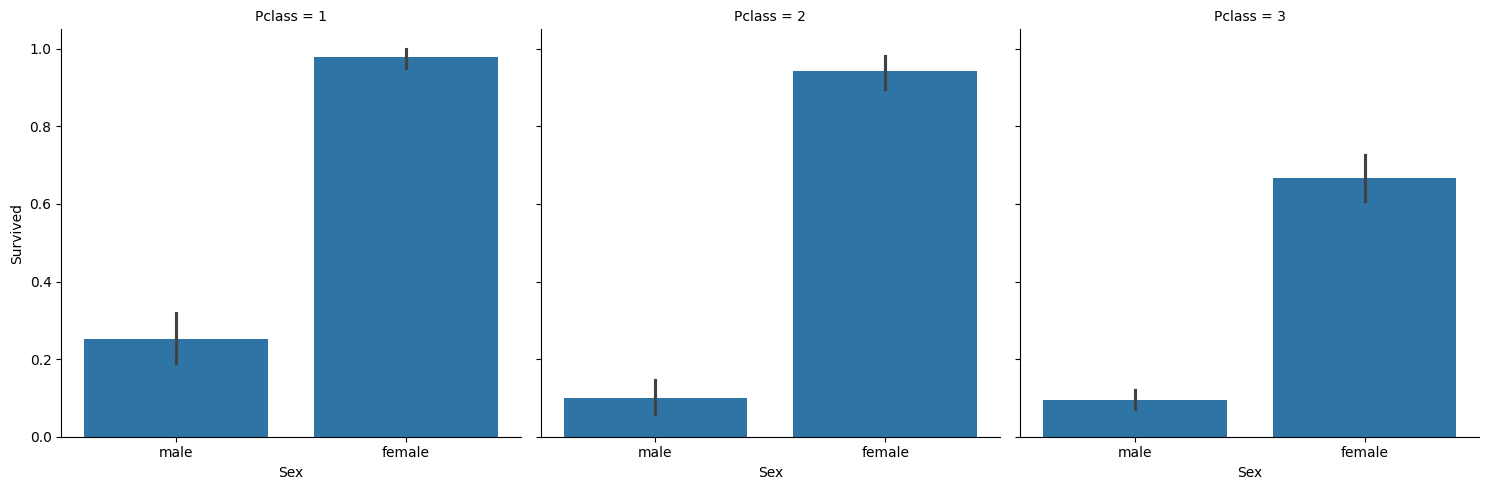

In [20]:
sns.catplot(data = df,y='Survived',x='Sex',col='Pclass',
            kind='bar', saturation=0.8)

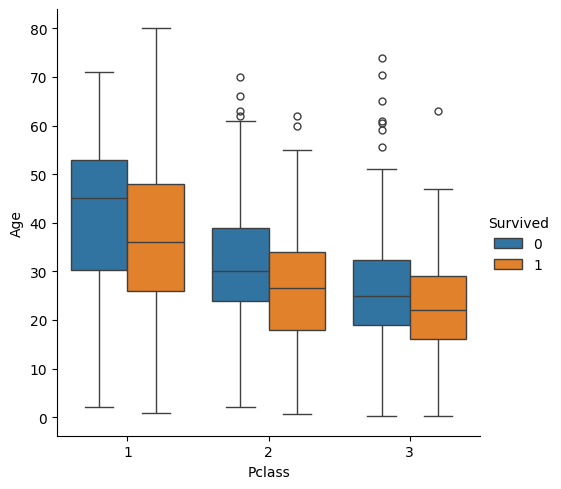

In [21]:
sns.catplot(data=df, x="Pclass", y="Age", hue="Survived", kind="box")

In [29]:
df[(df["Pclass"] == 3) & (df["Sex"] == "female")]["Age"].mean()


np.float64(22.185328947368422)

In [32]:
men = df[df.Sex == "male"] 
women = df[df.Sex == "female"]

In [33]:
stat, p = mannwhitneyu(men.Age, women.Age)
print('Критерий значимости = %.3f' % (p))

alpha = 0.1
if p > alpha:
  print('Возраст не отличался')
else:
  print('Действительно разный возраст, мужчины ', 
        men.Age.mean(),', женщины ', women.Age.mean())

Критерий значимости = nan
Действительно разный возраст, мужчины  30.58522796352584 , женщины  28.68708762886598


In [34]:
stat, p = mannwhitneyu(men.Fare, women.Fare)
print('Критерий значимости = %.3f' % (p))
alpha = 0.1
if p > alpha:
  print('Возраст не отличался')
else: 
  print('Действительно разный тариф, мужчины ',
        men.Fare.mean(),', женщины ', women.Fare.mean())

Критерий значимости = nan
Действительно разный тариф, мужчины  26.15460083135392 , женщины  46.1980965665236


In [37]:
df = df.drop(labels=['Cabin','Name','Ticket','Embarked'], axis=1)


C:\Users\Alexey\AppData\Local\Temp\ipykernel_6296\1475443811.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, y='Survived', x='Sex', col='Pclass', kind='bar', saturation=0.5, palette='Set2', legend=True)


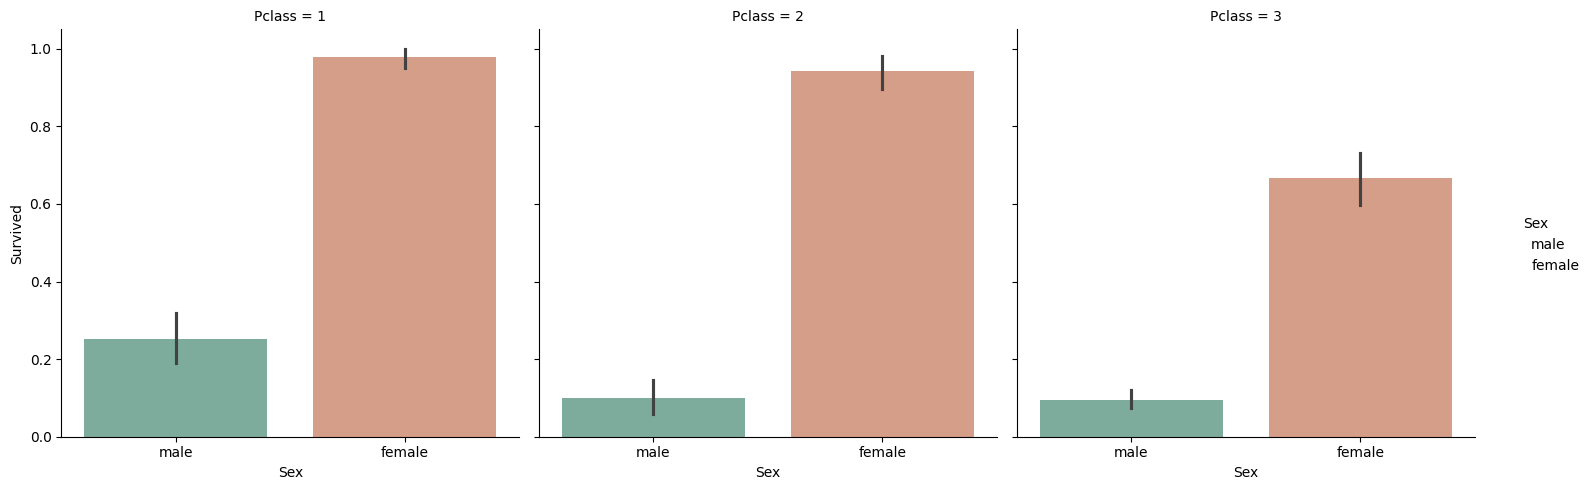

In [43]:
sns.catplot(data=df, y='Survived', x='Sex', col='Pclass', kind='bar', saturation=0.5, palette='Set2', legend=True)
plt.show()

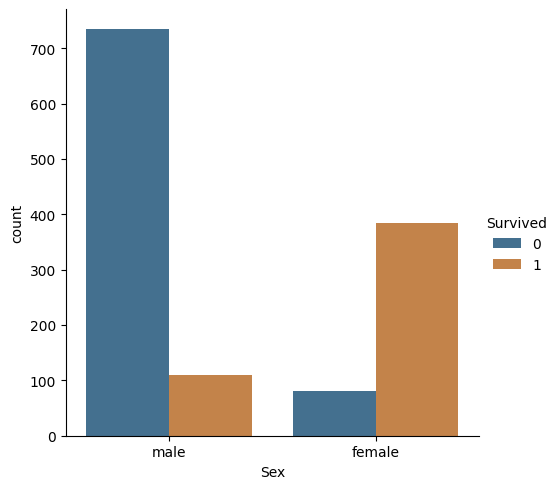

In [44]:
sns.catplot(data = df,hue = 'Survived', x = 'Sex',
            kind='count', saturation=0.5)

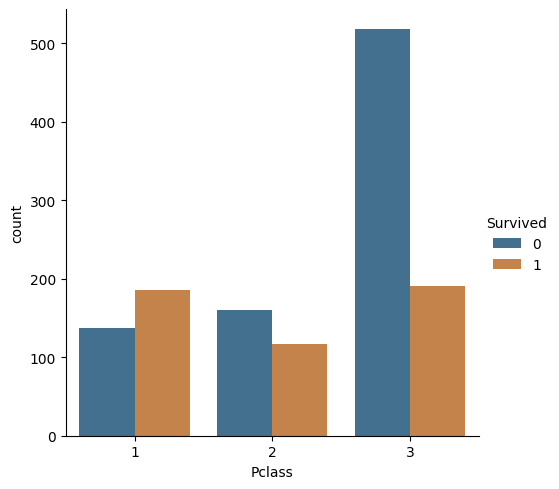

In [45]:
sns.catplot(data = df,hue = 'Survived', x = 'Pclass',
            kind='count', saturation=0.5)

<Axes: >

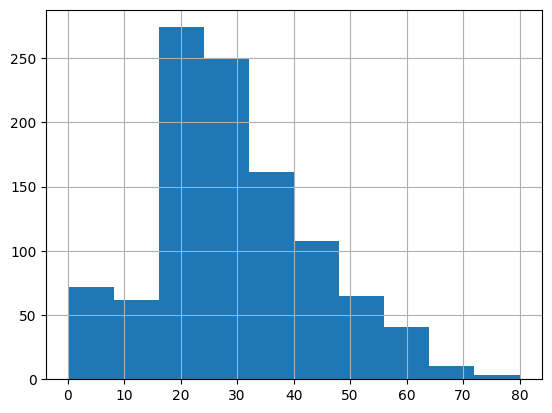

In [46]:
df.Age.hist()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '(0.169, 17.0]'),
  Text(1, 0, '(17.0, 22.0]'),
  Text(2, 0, '(22.0, 26.0]'),
  Text(3, 0, '(26.0, 30.0]'),
  Text(4, 0, '(30.0, 36.0]'),
  Text(5, 0, '(36.0, 46.0]'),
  Text(6, 0, '(46.0, 80.0]')])

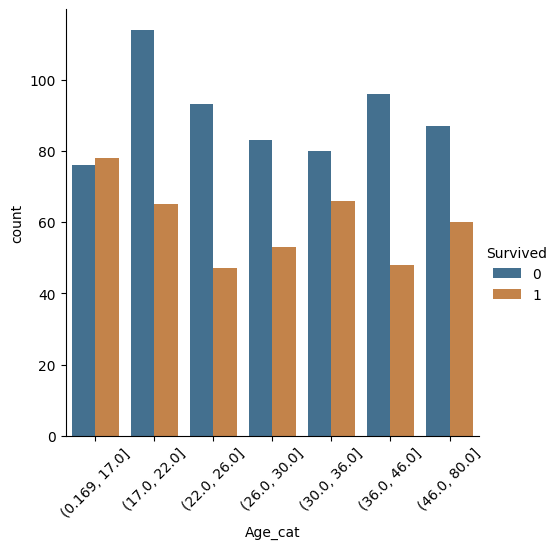

In [50]:
df['Age_cat'] = pd.qcut(df.Age,7)
sns.catplot(data = df,hue = 'Survived', x = 'Age_cat',
            kind='count', saturation=0.5) 
plt.xticks(rotation=45)

In [ ]:
df = df.drop(labels=['Cabin','Name','Ticket','Embarked'], axis=1)


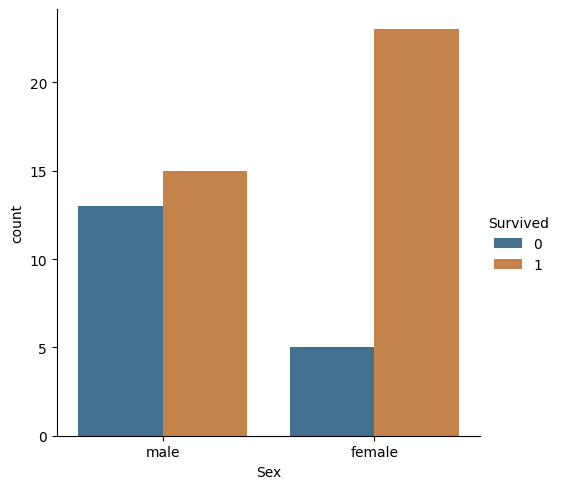

In [51]:
child= df[df.Age<6]
sns.catplot(data = child,hue = 'Survived', 
            x = 'Sex',kind='count', saturation=0.5)

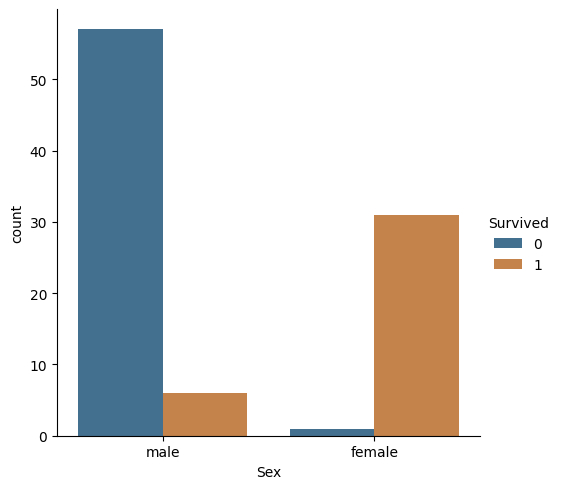

In [52]:
grand= df[df.Age>50]
sns.catplot(data = grand,hue = 'Survived', 
            x = 'Sex',kind='count', saturation=0.5)

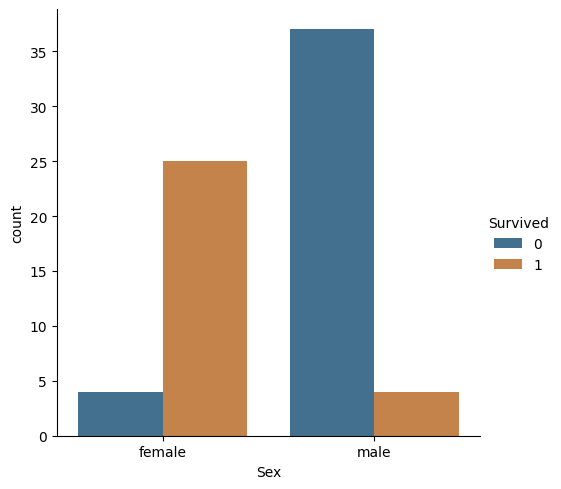

In [53]:
h = df[(df.Age>=29)&(df.Age<=30)]
sns.catplot(data = h,hue = 'Survived',
            x = 'Sex',kind='count', saturation=0.5)

In [54]:
df = df.drop('Age_cat', axis=1)
df['family'] = df['Parch'] + df['SibSp']

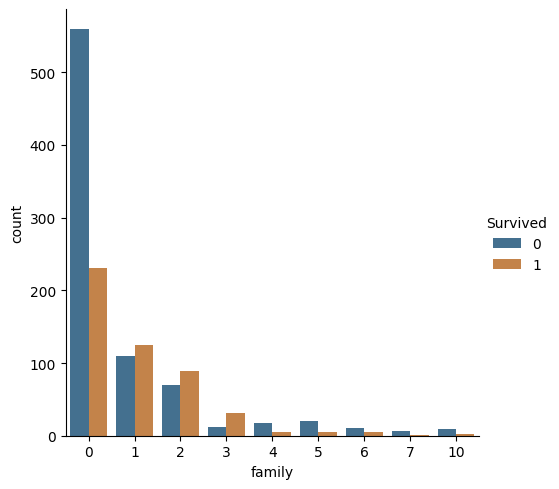

In [55]:
sns.catplot(data = df,hue = 'Survived', x = 'family',
            kind='count', saturation=0.5)

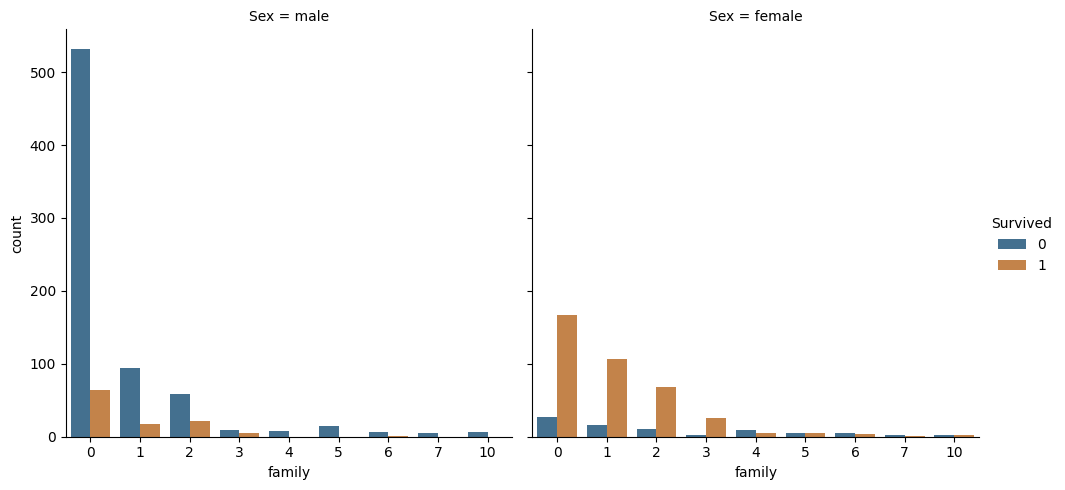

In [56]:
sns.catplot(data = df,hue = 'Survived', x = 'family',
            col = 'Sex',kind='count', saturation=0.5)

In [57]:
df['result'] = 1
df.loc[(df.Sex == 'male')&(df.Pclass == 3), 'result'] = 0
df.loc[(df.Sex == 'male')&(df.Age > 50), 'result'] = 0
df.loc[df['family']>3, 'result'] = 0

In [61]:
df.Survived

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Survived, Length: 1309, dtype: int64

In [62]:
df.result

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: result, Length: 1309, dtype: int64

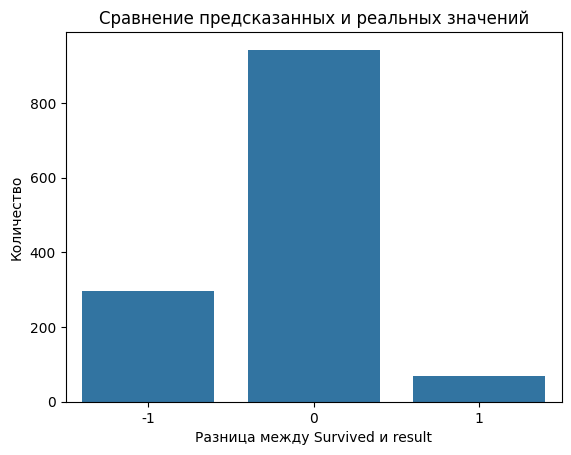

In [66]:
sns.countplot(x=(df['Survived'] - df['result']))
plt.xlabel('Разница между Survived и result')
plt.ylabel('Количество')
plt.title('Сравнение предсказанных и реальных значений')
plt.show()

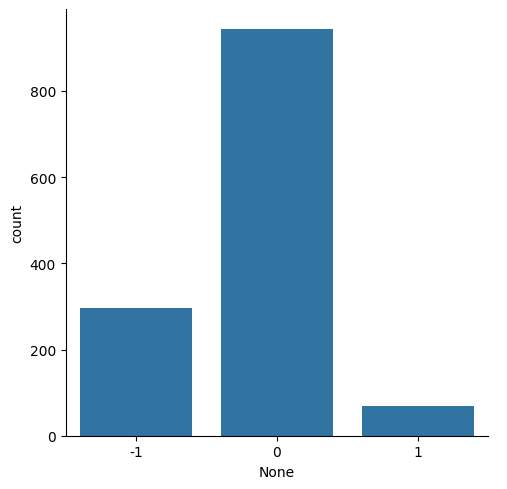

In [67]:
sns.catplot(data=df, x=(df['Survived'] - df['result']), kind="count")

In [60]:
df['errors'] = (df.Survived - df.result) ** 2
1 - df.errors.sum() / df.shape[0]

np.float64(0.7203972498090145)

In [68]:
df.loc[(df.Sex == 'male')&(df.Age >=29)&(df.Age <=39), 'result'] = 0
df['errors'] = (df.Survived - df.result)**2
1 - df.errors.sum() / df.shape[0]

np.float64(0.7608861726508785)

In [69]:
df['alive'] = 0
df.loc[(df.Sex == 'female')&((df.Pclass == 1)&
                             (df.Pclass == 2)), 'alive'] = 1
df.loc[df.Age < 6, 'alive'] = 1
df.loc[(df.Sex == 'female')&
       (df['family'] < 2), 'alive'] = 1
df.loc[(df.Sex == 'male')& (df['family'] < 2)&
       (df.Pclass == 1), 'alive'] = 1

In [70]:
df['errors_2'] = (df.Survived - df.alive)**2
1 - df.errors_2.sum() / df.shape[0]

np.float64(0.7524828113063406)